In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
final_clean_data_scaled =  pd.read_csv('/content/finalclean_data_scaled (1).csv')
final_clean_data_scaled

,Unnamed: 0,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,0,F00000001,188,1,0,0,0.0,0,0,1,0,0,1,0,0
1,1,F00000003,209,1,0,0,0.0,0,1,1,0,0,0,1,0
2,2,F00000004,257,1,0,0,0.0,0,1,1,0,0,0,1,0
3,3,F00000005,257,1,1,0,0.0,0,1,1,0,0,0,1,0
4,4,F00000006,342,1,0,0,0.0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88853,8995,F00155793,1785,1,0,60,30.0,16,0,0,1,0,0,1,0
88854,8996,F00155801,1898,1,0,15,38.0,3,0,0,1,0,1,0,0
88855,8997,F00155882,2542,1,0,10,27.0,21,0,0,1,0,0,1,0
88856,8998,F00155899,2687,1,0,10,27.0,21,0,0,1,0,0,1,0


In [ ]:
final_clean_data_scaled.drop('Unnamed: 0',axis =1,inplace = True)
#droppin the unnamed column.

In [ ]:
final_clean_data_scaled.drop('ID',axis =1, inplace=True)
final_clean_data_scaled

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,188,1,0,0,0.0,0,0,1,0,0,1,0,0
1,209,1,0,0,0.0,0,1,1,0,0,0,1,0
2,257,1,0,0,0.0,0,1,1,0,0,0,1,0
3,257,1,1,0,0.0,0,1,1,0,0,0,1,0
4,342,1,0,0,0.0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88853,1785,1,0,60,30.0,16,0,0,1,0,0,1,0
88854,1898,1,0,15,38.0,3,0,0,1,0,1,0,0
88855,2542,1,0,10,27.0,21,0,0,1,0,0,1,0
88856,2687,1,0,10,27.0,21,0,0,1,0,0,1,0


DATA PLOTTING BEFORE NORMALIZATION

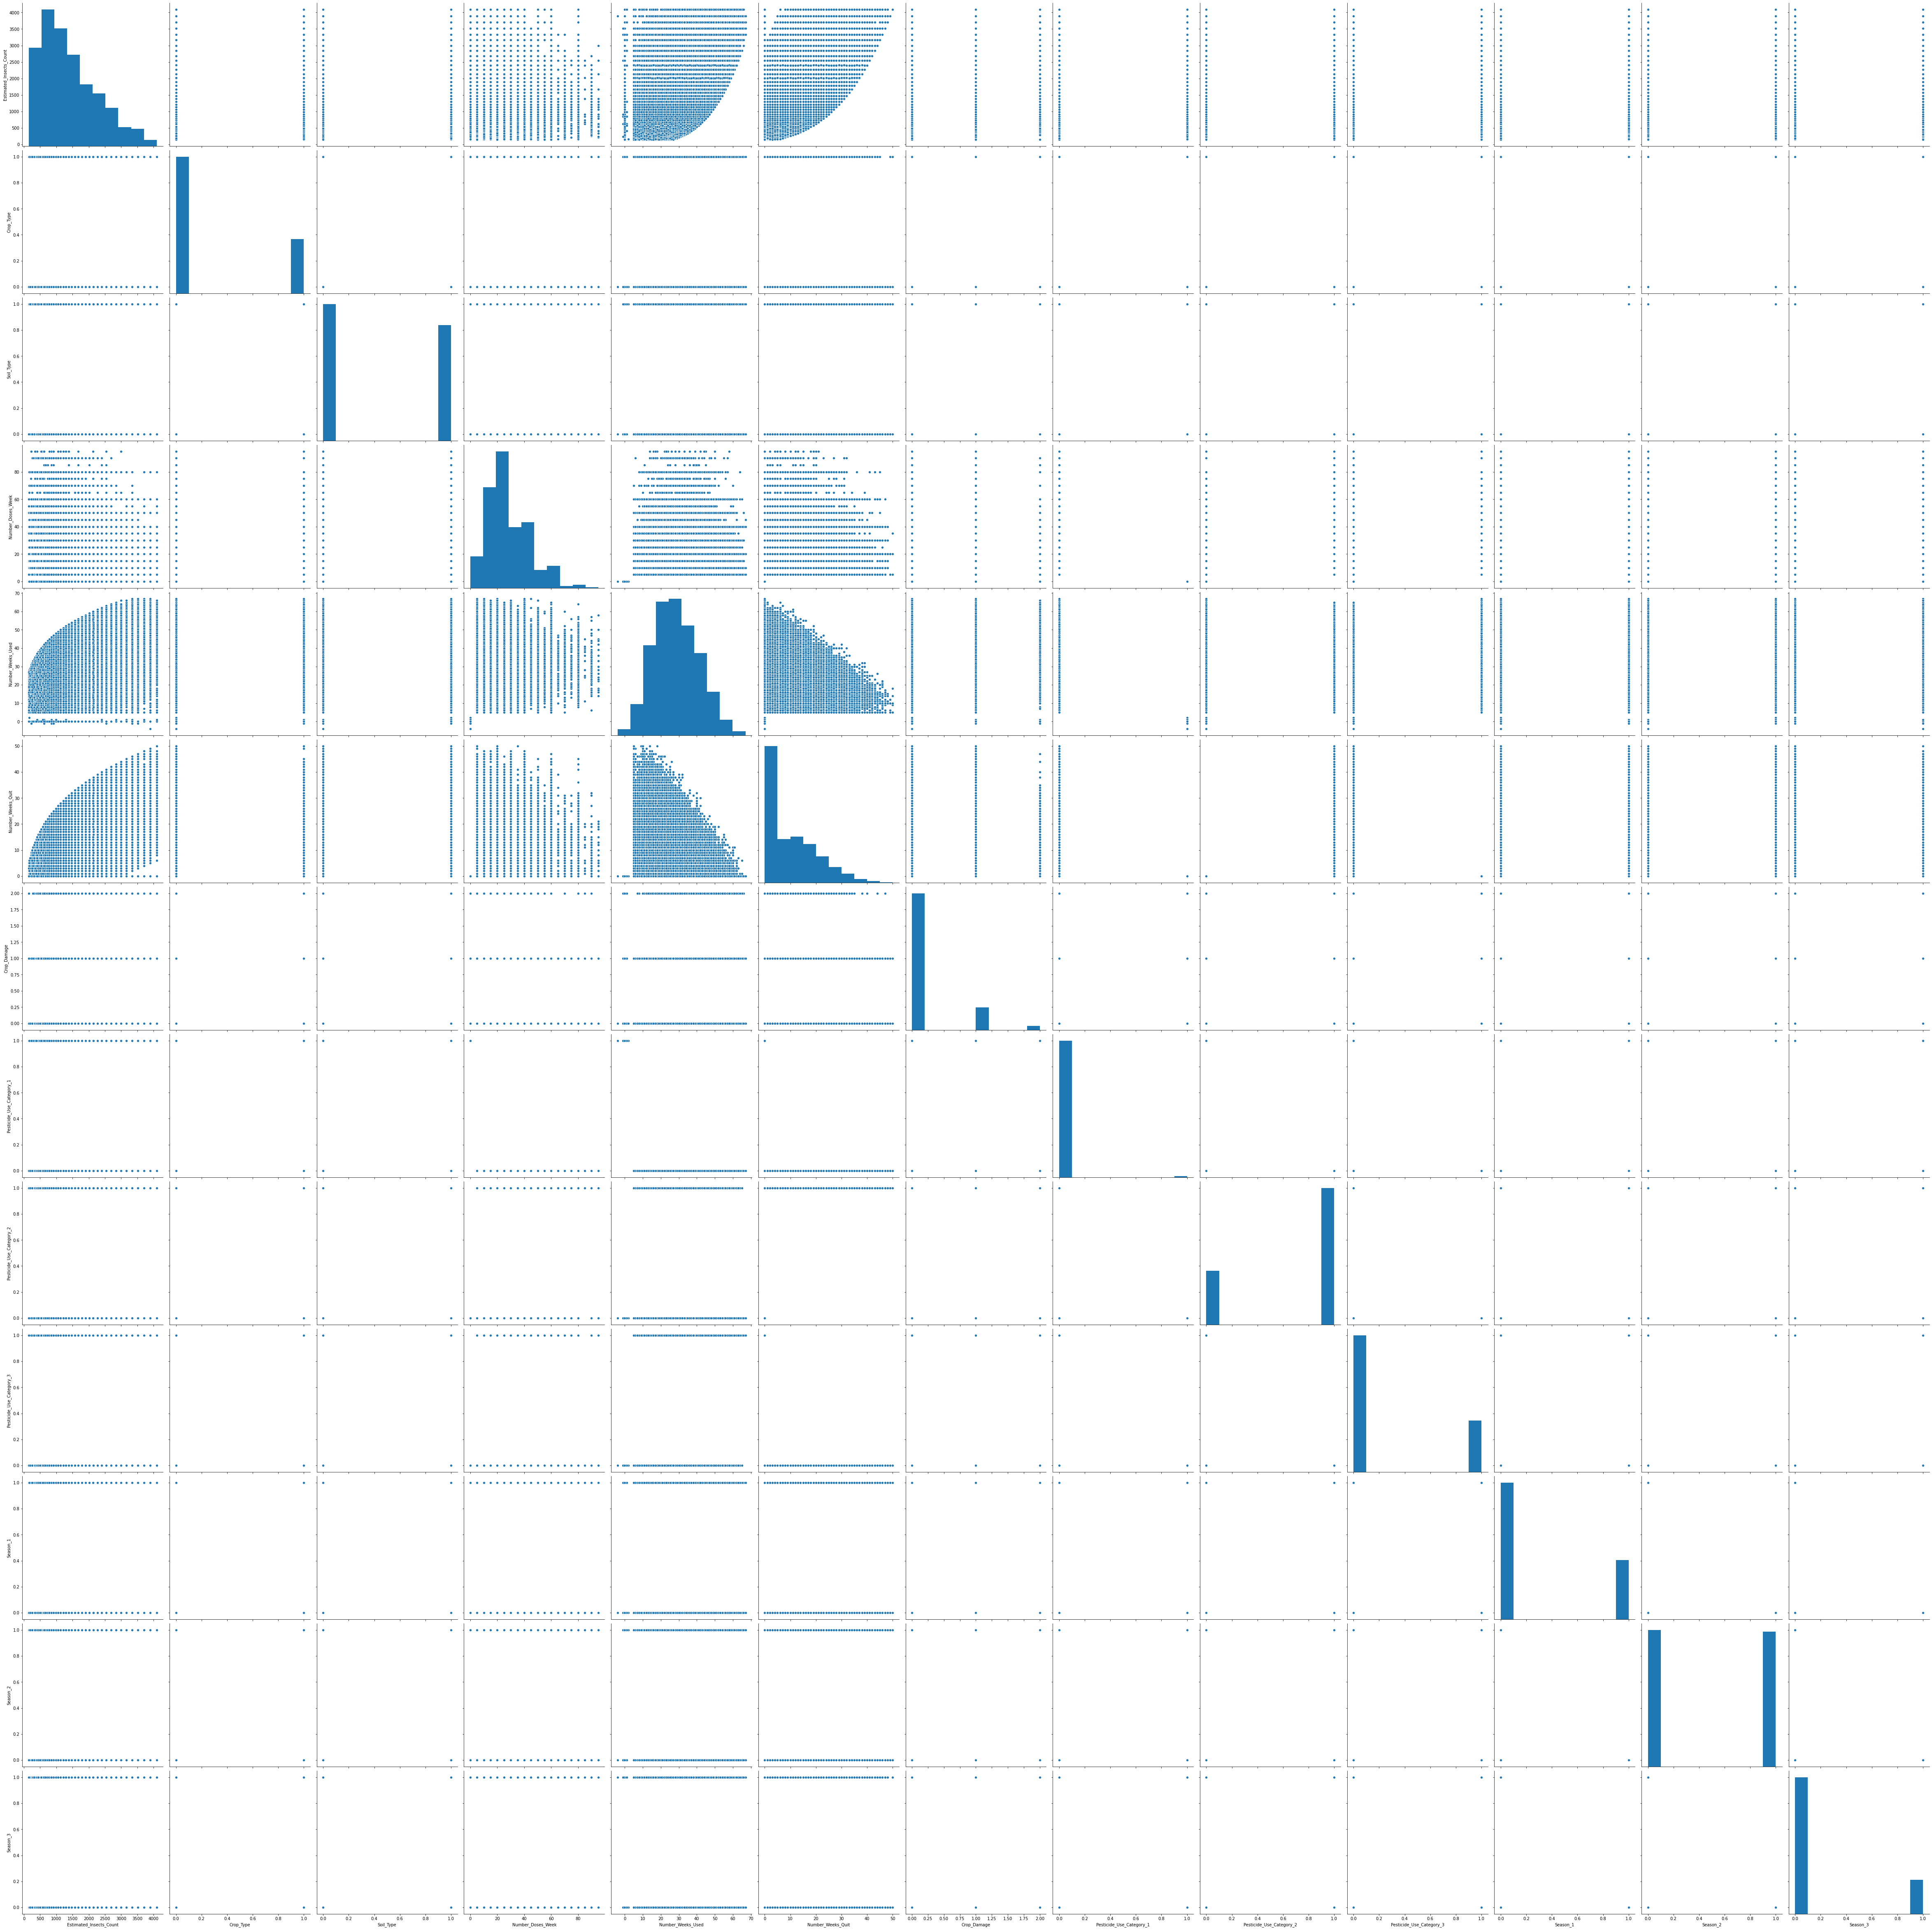

In [ ]:
sns.pairplot(final_clean_data_scaled, height=5)

In [ ]:
#NORMALIZING THE Estimated_Insects_Count COLUMN
final_clean_data_scaled.Estimated_Insects_Count = (final_clean_data_scaled.Estimated_Insects_Count - final_clean_data_scaled.Estimated_Insects_Count.min())/(final_clean_data_scaled.Estimated_Insects_Count.max() - final_clean_data_scaled.Estimated_Insects_Count.min())

In [ ]:
#NORMALIZING THE Number_Weeks_Used COLUMN
final_clean_data_scaled.Number_Weeks_Used = (final_clean_data_scaled.Number_Weeks_Used - final_clean_data_scaled.Number_Weeks_Used.min())/(final_clean_data_scaled.Number_Weeks_Used.max() - final_clean_data_scaled.Number_Weeks_Used.min())

In [ ]:
#NORMALIZING THE Number_Weeks_Quit COLUMN
final_clean_data_scaled.Number_Weeks_Quit = (final_clean_data_scaled.Number_Weeks_Quit - final_clean_data_scaled.Number_Weeks_Quit.min())/(final_clean_data_scaled.Number_Weeks_Quit.max() - final_clean_data_scaled.Number_Weeks_Quit.min())

In [ ]:
#NORMALIZING THE Number_Doses_Weekt COLUMN
final_clean_data_scaled.Number_Doses_Week = (final_clean_data_scaled.Number_Doses_Week - final_clean_data_scaled.Number_Doses_Week.min())/(final_clean_data_scaled.Number_Doses_Week.max() - final_clean_data_scaled.Number_Doses_Week.min())

VISUALIZATION AFTER NORMALIZATION


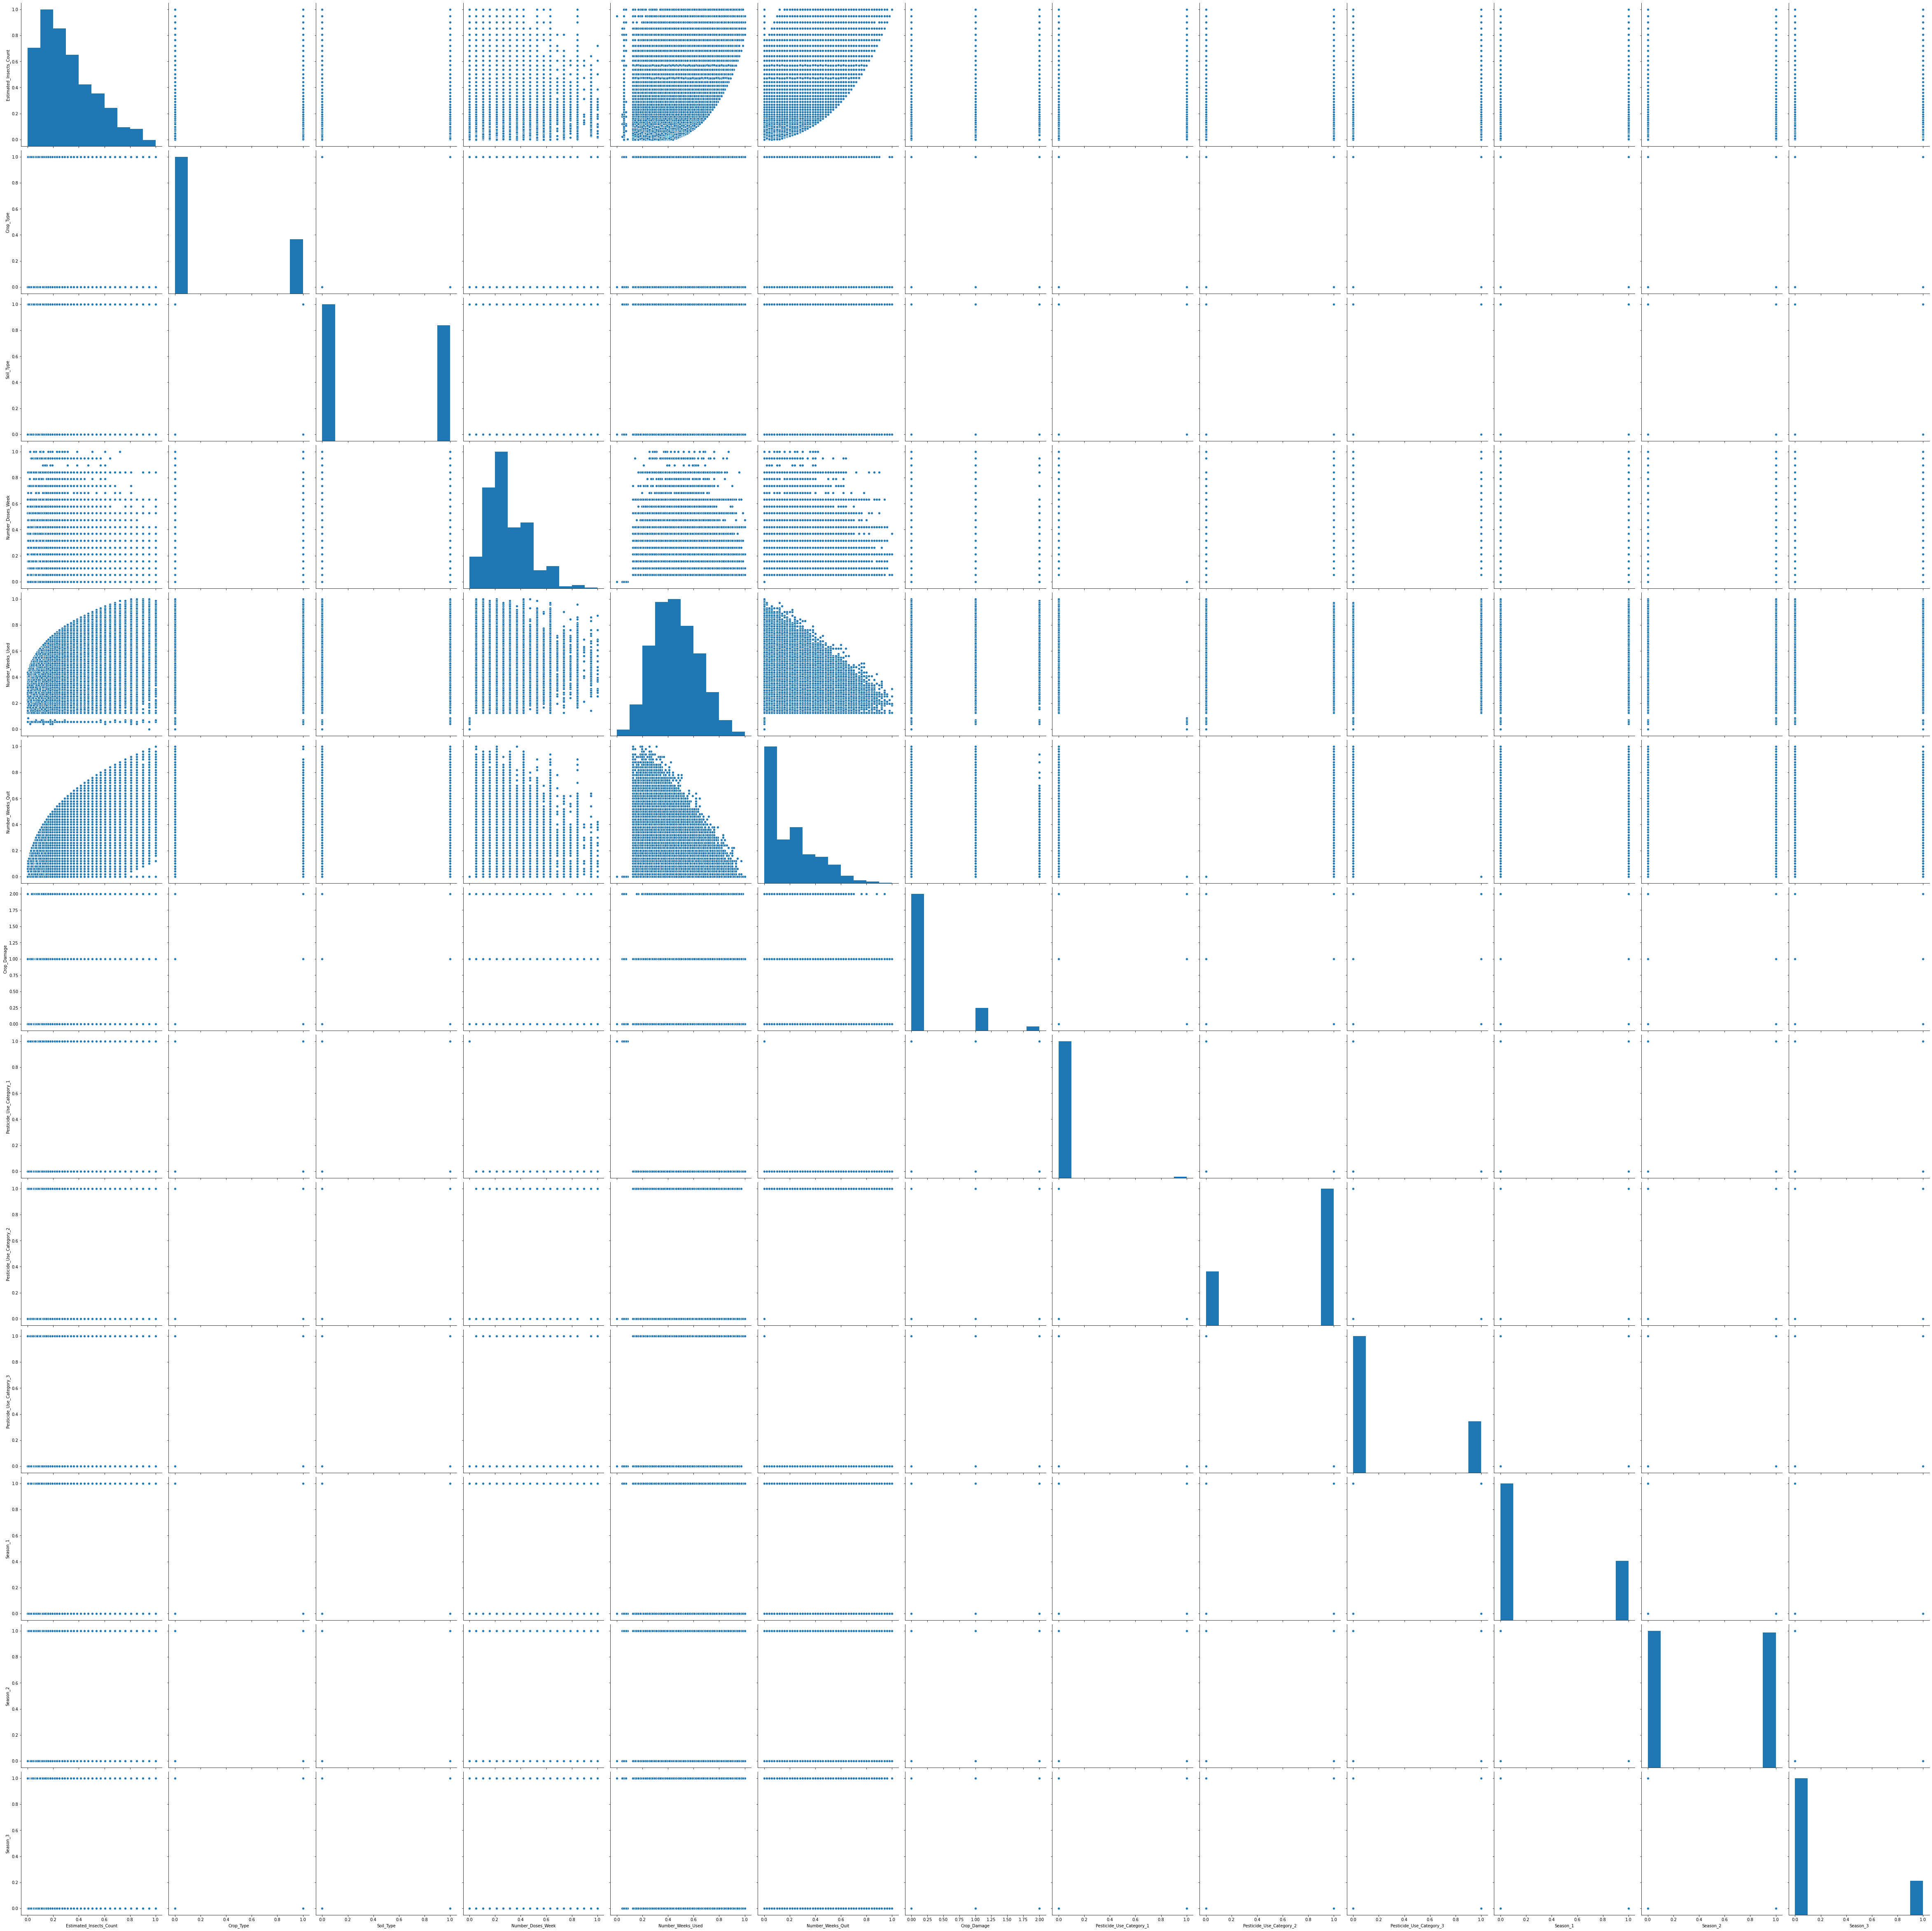

In [ ]:
sns.pairplot(final_clean_data_scaled, height=5)

In [ ]:
#Y IS THE DEPENDENT VARIABLE
y = final_clean_data_scaled['Crop_Damage']
y

0        0
1        1
2        1
3        1
4        1
        ..
88853    0
88854    0
88855    0
88856    0
88857    0
Name: Crop_Damage, Length: 88858, dtype: int64

In [ ]:
#X IS THE FEATURE DATASET
final_clean_data_scaled.drop('Crop_Damage',axis =1, inplace=True)
X = final_clean_data_scaled

In [ ]:

X

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,0.009628,1,0,0.000000,0.056338,0.00,1,0,0,1,0,0
1,0.014948,1,0,0.000000,0.056338,0.00,1,0,0,0,1,0
2,0.027109,1,0,0.000000,0.056338,0.00,1,0,0,0,1,0
3,0.027109,1,1,0.000000,0.056338,0.00,1,0,0,0,1,0
4,0.048645,1,0,0.000000,0.056338,0.00,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
88853,0.414239,1,0,0.631579,0.478873,0.32,0,1,0,0,1,0
88854,0.442868,1,0,0.157895,0.591549,0.06,0,1,0,1,0,0
88855,0.606030,1,0,0.105263,0.436620,0.42,0,1,0,0,1,0
88856,0.642767,1,0,0.105263,0.436620,0.42,0,1,0,0,1,0


In [ ]:
#SPLIITING THE DATASET INTO TRAIN AND TEST SET
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=0)

## LOGISTIC REGRESSION

In [ ]:
#CROSS VALIDATION ERROR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logisticRegr = LogisticRegression(random_state=0,C=2^3,solver='sag',max_iter=5000,)
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_valid)

print(accuracy_score(y_valid,predictions))

0.8365968939905469


In [ ]:
#TRAINING ERROR 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logisticRegr = LogisticRegression(random_state=0,C=2^3,solver='sag',max_iter=5000,)
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_train)

print(accuracy_score(y_train,predictions))

0.8392140767122562


# RANDOM FOREST

In [ ]:
#CROSS VALIDATION ERROR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, max_depth = 12,n_jobs = -1,random_state=0,)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_valid)
print(accuracy_score(y_valid,rf_pred))

0.8437992347512941


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, max_depth = 12,n_jobs = -1,random_state=0)
rf.fit(X_train,y_train)
predictions = rf.predict(X_train)

print(accuracy_score(y_train,predictions))


0.8568364469276701
